In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [47]:
iris_x, iris_y = datasets.load_iris(return_X_y = True, as_frame = True)
iris = iris_x.assign(target=iris_y)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [48]:
nan_array = np.random.random(iris.shape)<0.2
iris_nan = iris.mask(nan_array)
iris_nan

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,NaN,1.3,0.2,NaN
3,4.6,NaN,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,NaN,2.0
146,6.3,2.5,5.0,1.9,2.0
147,NaN,3.0,5.2,NaN,2.0
148,6.2,3.4,5.4,2.3,2.0


In [49]:
iris_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  121 non-null    float64
 1   sepal width (cm)   107 non-null    float64
 2   petal length (cm)  122 non-null    float64
 3   petal width (cm)   124 non-null    float64
 4   target             123 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


podemos eliminar las columnas con muchos valores nulos (aunque este no es el caso)

In [50]:
iris_nan.drop(["sepal length (cm)"], axis=1)

,sepal width (cm),petal length (cm),petal width (cm),target
0,3.5,1.4,0.2,0.0
1,3.0,1.4,0.2,0.0
2,NaN,1.3,0.2,NaN
3,NaN,1.5,0.2,0.0
4,3.6,1.4,0.2,0.0
...,...,...,...,...
145,3.0,5.2,NaN,2.0
146,2.5,5.0,1.9,2.0
147,3.0,5.2,NaN,2.0
148,3.4,5.4,2.3,2.0


Con fillna se remplazan los valores NaN, ya no hay nulos despues del comando

In [51]:
iris_nan["sepal width (cm)"].fillna("None")

0       3.5
1       3.0
2      None
3      None
4       3.6
       ... 
145     3.0
146     2.5
147     3.0
148     3.4
149    None
Name: sepal width (cm), Length: 150, dtype: object

Sin embargo, el valor adicionado en la mayoria de los casos no agrega informacion si es un valor aleatorio, o como en este caso, simplemente cambiamos el NaN a None, practicamente lo mismo, para esto se suele usar otros tipos de metricas, como la media, mediana y moda

In [52]:
mean_iris_example = iris_nan["sepal width (cm)"].fillna(iris_nan["sepal width (cm)"].mean())
#mean_iris_example = iris_nan["sepal width (cm)"].fillna(iris_nan["sepal width (cm)"].mode())
#mean_iris_example = iris_nan["sepal width (cm)"].fillna(iris_nan["sepal width (cm)"].median())
mean_iris_example

0      3.500000
1      3.000000
2      3.042056
3      3.042056
4      3.600000
         ...   
145    3.000000
146    2.500000
147    3.000000
148    3.400000
149    3.042056
Name: sepal width (cm), Length: 150, dtype: float64

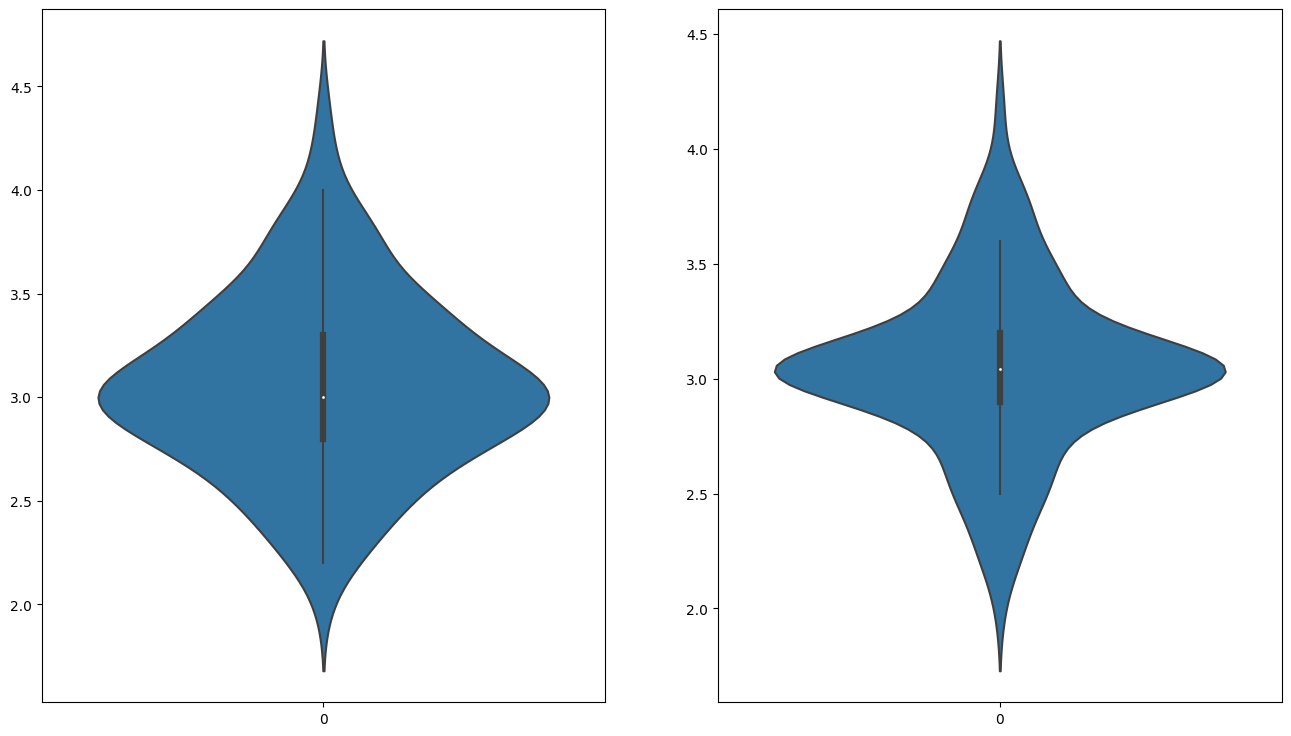

In [53]:
fig, axs = plt.subplots(1,2,figsize =(16, 9))
sns.violinplot(data=iris["sepal width (cm)"], ax=axs[0])
sns.violinplot(data=mean_iris_example, ax=axs[1])
plt.show()

Sin embargo, es recomendable estos metodos si hay poca cantidad de datos, debido a que como se ve en la grafica, va a afectar la distribucion de los mismos.